<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/Malaysia%20EDA/Colby/Assignment_Pandas_Colby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Malaysia GE-14 Result

This project is to examine the Malaysian general election result in 2018. The dataset consists of 1647 rows and 12 columns and is acquired from https://www.kaggle.com/. From this dataset, we could investigate the election result in terms of state results by candidate via data preparation, cleaning, and visualization. 

**Group members:**
1. Chloe Racquelmae Kennedy A20EC0026
2. Lee Cai Xuan A20EC0062

## Downloading the Dataset

* Election-Results-2018 - State_Results_By_Candidate   
* List of each candidate's results for the parliamentary and state elections in GE14.
* A combination of 12 columns and 1647 rows

#### Attribute Information:
<table>
    <thead>
        <tr>
            <th>Attribute</th>
            <th>Acronym</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan=2>Gender</td>
            <td>L</td>
            <td>Male (Lelaki)</td>
        </tr>
        <tr>
            <td>P</td>
            <td>Female (Perempuan)</td>
        </tr>
        <tr>
            <td rowspan=2>Status</td>
            <td>MNG</td>
            <td>Win (Menang)</td>
        </tr>
        <tr>
            <td>KLH</td>
            <td>Lose (Kalah)</td>
        </tr>
    </tbody>
</table>


Let's begin by downloading the data, and listing the files within the dataset.

There are 2 options:

**1. Load the dataset directly from Kaggle into Google Colab**

  Download the API Credentials first and then use the code below:

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d terenctb/malaysia-ge14-election-results-parliament

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/76.2k [00:00<?, ?B/s]
100% 76.2k/76.2k [00:00<00:00, 55.3MB/s]


  Unzip the dataset file

In [ ]:
! unzip malaysia-ge14-election-results-parliament.zip

Archive:  malaysia-ge14-election-results-parliament.zip
  inflating: Election-Results-2018 - Parlimen_Results_By_Candidate.csv  
  inflating: Election-Results-2018 - State_Results_By_Candidate.csv  
  inflating: Election-Results-2018 - Total_Votes_by_Seat.csv  


**2. Download the dataset directly from the website:**
https://www.kaggle.com/datasets/terenctb/malaysia-ge14-election-results-parliament?select=Election-Results-2018+-+State_Results_By_Candidate.csv

  From the data explorer in Kaggle, download the dataset named "Election-Results-2018 - State_Results_By_Candidate" (141.17kB)

The dataset has been downloaded and extracted.

**Next step**

Upload the downloaded dataset into github which could be access from this link: 
https://raw.githubusercontent.com/Racquelmae/dataset/main/Election-Results-2018%20-%20State_Results_By_Candidate.csv

## Data Preparation and Cleaning

In this process, the dataset will be clean and transform to make sure it is prepare for the analysis step and could produce great visualization. 


**Step 1:** Load the dataset into a data frame using Pandas

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Racquelmae/dataset/main/Election-Results-2018%20-%20State_Results_By_Candidate.csv')
df.head()

,State,Seat ID,Seat Name,Candidate Name,Candidate Party,Votes for Candidate,Total Votes Cast,% of total Votes,Candidate Win,Gender,Status,Pekerjaan
0,Johor,N.01,BULOH KASAP,ZAHARI SARIP,BN,"9,186","17,495",52.51%,1,L,MNG,0
1,Johor,N.01,BULOH KASAP,NORSAMSU MOHD YUSOF,PKR,"8,309","17,495",47.49%,0,L,KLH,0
2,Johor,N.02,JEMENTAH,CHIAM YOK MENG,BN,"9,335","27,657",33.75%,0,L,KLH,0
3,Johor,N.02,JEMENTAH,TAN CHEN CHOON,PKR,"16,336","27,657",59.07%,1,L,MNG,0
4,Johor,N.02,JEMENTAH,KHAIRUL FAIZI BIN AHMAD KAMIL,PAS,"1,986","27,657",7.18%,0,L,HD,0


**Step 2:** Explore the number of rows & columns, ranges of values etc.

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   State                1646 non-null   object
 1   Seat ID              1646 non-null   object
 2   Seat Name            1646 non-null   object
 3   Candidate Name       1646 non-null   object
 4   Candidate Party      1646 non-null   object
 5   Votes for Candidate  1646 non-null   object
 6   Total Votes Cast     1646 non-null   object
 7   % of total Votes     1646 non-null   object
 8   Candidate Win        1646 non-null   int64 
 9   Gender               1646 non-null   object
 10  Status               1646 non-null   object
 11  Pekerjaan            1646 non-null   object
dtypes: int64(1), object(11)
memory usage: 154.4+ KB


In [147]:
df.dtypes

State                  object
Seat ID                object
Seat Name              object
Candidate Name         object
Candidate Party        object
Votes for Candidate    object
Total Votes Cast       object
% of total Votes       object
Candidate Win           int64
Gender                 object
Status                 object
Pekerjaan              object
dtype: object

In [148]:
df['Candidate Party'].unique()

array(['BN', 'PKR', 'PAS', 'BEBAS - POKOK', 'BEBAS - KUDA',
       'BEBAS - GAJAH', 'BEBAS - MOTOSIKAL', 'BEBAS - KUNCI',
       'BEBAS - BEG', 'PRM', 'PSM', 'BEBAS - PEN', 'BEBAS - CAWAN',
       'BEBAS - KERETA', 'BEBAS - BUKU', 'PAP', 'BEBAS - RUMAH',
       'BEBAS - CINCIN', 'BEBAS - IKAN', 'MU', 'PFP', 'BEBAS - JAM',
       'PCM', 'BEBAS - KAPAL TERBANG', 'BERJASA', 'PPRS', 'HR', 'WARISAN',
       'SOLIDARITI', 'PKS', 'PCS', 'ANAKNEGERI', 'BEBAS - TRAKTOR',
       'SAPP', 'DAP', 'STAR', 'USNO', 'AMANAH'], dtype=object)

**Step 3:** Handle missing, incorrect and invalid data

In [149]:
df = df.dropna()
df

,State,Seat ID,Seat Name,Candidate Name,Candidate Party,Votes for Candidate,Total Votes Cast,% of total Votes,Candidate Win,Gender,Status,Pekerjaan
0,Johor,N.01,BULOH KASAP,ZAHARI SARIP,BN,"9,186","17,495",52.51%,1,L,MNG,0
1,Johor,N.01,BULOH KASAP,NORSAMSU MOHD YUSOF,PKR,"8,309","17,495",47.49%,0,L,KLH,0
2,Johor,N.02,JEMENTAH,CHIAM YOK MENG,BN,"9,335","27,657",33.75%,0,L,KLH,0
3,Johor,N.02,JEMENTAH,TAN CHEN CHOON,PKR,"16,336","27,657",59.07%,1,L,MNG,0
4,Johor,N.02,JEMENTAH,KHAIRUL FAIZI BIN AHMAD KAMIL,PAS,"1,986","27,657",7.18%,0,L,HD,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1641,Sabah,N.59,TANJONG BATU,ISMAIL SENANG,WARISAN,"6,552","16,767",39.08%,0,L,KLH,BEKERJA SENDIRI
1642,Sabah,N.60,SEBATIK,YUSRI HJ YUNUS,PPRS,38,"5,285",0.72%,0,L,HD,0
1643,Sabah,N.60,SEBATIK,USTAZ ROSLAN RAMLI,PAS,504,"5,285",9.54%,0,L,HD,0
1644,Sabah,N.60,SEBATIK,DATUK HJ. ABD MUIS HJ. PICHO,BN,"2,468","5,285",46.70%,1,L,MNG,TIADA


From the output above, it shows that there are still 1646 rows with 12 columns. Therefore, it means that there is no missing values in this dataset.



In [3]:
df = df[df['Total Votes Cast'] != '0']
df

,State,Seat ID,Seat Name,Candidate Name,Candidate Party,Votes for Candidate,Total Votes Cast,% of total Votes,Candidate Win,Gender,Status,Pekerjaan
0,Johor,N.01,BULOH KASAP,ZAHARI SARIP,BN,"9,186","17,495",52.51%,1,L,MNG,0
1,Johor,N.01,BULOH KASAP,NORSAMSU MOHD YUSOF,PKR,"8,309","17,495",47.49%,0,L,KLH,0
2,Johor,N.02,JEMENTAH,CHIAM YOK MENG,BN,"9,335","27,657",33.75%,0,L,KLH,0
3,Johor,N.02,JEMENTAH,TAN CHEN CHOON,PKR,"16,336","27,657",59.07%,1,L,MNG,0
4,Johor,N.02,JEMENTAH,KHAIRUL FAIZI BIN AHMAD KAMIL,PAS,"1,986","27,657",7.18%,0,L,HD,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1641,Sabah,N.59,TANJONG BATU,ISMAIL SENANG,WARISAN,"6,552","16,767",39.08%,0,L,KLH,BEKERJA SENDIRI
1642,Sabah,N.60,SEBATIK,YUSRI HJ YUNUS,PPRS,38,"5,285",0.72%,0,L,HD,0
1643,Sabah,N.60,SEBATIK,USTAZ ROSLAN RAMLI,PAS,504,"5,285",9.54%,0,L,HD,0
1644,Sabah,N.60,SEBATIK,DATUK HJ. ABD MUIS HJ. PICHO,BN,"2,468","5,285",46.70%,1,L,MNG,TIADA


Based on the output above, a candidate with zero votes has been removed from the dataset and now the dataset is left with 1645 rows.

**Step 4:** Perform any additional steps

Drop columns that are not useful:

The "Candidate Name" column will be removed.

In [4]:
cols = ['Candidate Name']
df = df.drop(cols, axis=1)
df.head()

,State,Seat ID,Seat Name,Candidate Party,Votes for Candidate,Total Votes Cast,% of total Votes,Candidate Win,Gender,Status,Pekerjaan
0,Johor,N.01,BULOH KASAP,BN,"9,186","17,495",52.51%,1,L,MNG,0
1,Johor,N.01,BULOH KASAP,PKR,"8,309","17,495",47.49%,0,L,KLH,0
2,Johor,N.02,JEMENTAH,BN,"9,335","27,657",33.75%,0,L,KLH,0
3,Johor,N.02,JEMENTAH,PKR,"16,336","27,657",59.07%,1,L,MNG,0
4,Johor,N.02,JEMENTAH,PAS,"1,986","27,657",7.18%,0,L,HD,0


Remove the comma (,) from the data values in the columns of "Votes for Candidate" and "Total Votes Cast".

In [5]:
df['Votes for Candidate'] = df['Votes for Candidate'].str.replace(',','')
df['Total Votes Cast'] = df['Total Votes Cast'].str.replace(',','')
df.head()

,State,Seat ID,Seat Name,Candidate Party,Votes for Candidate,Total Votes Cast,% of total Votes,Candidate Win,Gender,Status,Pekerjaan
0,Johor,N.01,BULOH KASAP,BN,9186,17495,52.51%,1,L,MNG,0
1,Johor,N.01,BULOH KASAP,PKR,8309,17495,47.49%,0,L,KLH,0
2,Johor,N.02,JEMENTAH,BN,9335,27657,33.75%,0,L,KLH,0
3,Johor,N.02,JEMENTAH,PKR,16336,27657,59.07%,1,L,MNG,0
4,Johor,N.02,JEMENTAH,PAS,1986,27657,7.18%,0,L,HD,0


Change the data type of "Votes for Candidate", "Total Votes Cast" columns to int64 data type.

In [6]:
df['Votes for Candidate'] = df['Votes for Candidate'].apply(pd.to_numeric, errors='coerce').fillna(0.0)
df['Total Votes Cast'] = df['Total Votes Cast'].apply(pd.to_numeric, errors='coerce').fillna(0.0)
df['Votes for Candidate'] = df['Votes for Candidate'].astype('Int64')
df.dtypes

State                  object
Seat ID                object
Seat Name              object
Candidate Party        object
Votes for Candidate     Int64
Total Votes Cast        int64
% of total Votes       object
Candidate Win           int64
Gender                 object
Status                 object
Pekerjaan              object
dtype: object

Remove (%) from the "% for total Votes" columns and convert the data type from object to float64.

In [7]:
df['% of total Votes'] = (df['% of total Votes'].str[:-1].apply(pd.to_numeric, errors='coerce').fillna(0.0))
df.dtypes

State                   object
Seat ID                 object
Seat Name               object
Candidate Party         object
Votes for Candidate      Int64
Total Votes Cast         int64
% of total Votes       float64
Candidate Win            int64
Gender                  object
Status                  object
Pekerjaan               object
dtype: object

Convert all the strings in the "State" column to upper letter.

In [8]:
df['State'] = df['State'].str.upper()
df.head()

,State,Seat ID,Seat Name,Candidate Party,Votes for Candidate,Total Votes Cast,% of total Votes,Candidate Win,Gender,Status,Pekerjaan
0,JOHOR,N.01,BULOH KASAP,BN,9186,17495,52.51,1,L,MNG,0
1,JOHOR,N.01,BULOH KASAP,PKR,8309,17495,47.49,0,L,KLH,0
2,JOHOR,N.02,JEMENTAH,BN,9335,27657,33.75,0,L,KLH,0
3,JOHOR,N.02,JEMENTAH,PKR,16336,27657,59.07,1,L,MNG,0
4,JOHOR,N.02,JEMENTAH,PAS,1986,27657,7.18,0,L,HD,0


Convert the data type of "Pekerjaan" column to string and replace the "-", "0", "TIADA" to same value "NaN".

In [9]:
df['Pekerjaan'] = df['Pekerjaan'].replace(['0', '-', 'TIADA'], 'NaN')
df.head()

,State,Seat ID,Seat Name,Candidate Party,Votes for Candidate,Total Votes Cast,% of total Votes,Candidate Win,Gender,Status,Pekerjaan
0,JOHOR,N.01,BULOH KASAP,BN,9186,17495,52.51,1,L,MNG,NaN
1,JOHOR,N.01,BULOH KASAP,PKR,8309,17495,47.49,0,L,KLH,NaN
2,JOHOR,N.02,JEMENTAH,BN,9335,27657,33.75,0,L,KLH,NaN
3,JOHOR,N.02,JEMENTAH,PKR,16336,27657,59.07,1,L,MNG,NaN
4,JOHOR,N.02,JEMENTAH,PAS,1986,27657,7.18,0,L,HD,NaN


## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [10]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Total number of votes for all candidate party

In [215]:
party = df.groupby(['Candidate Party'])['Votes for Candidate'].sum()
party

Candidate Party
AMANAH                       193
ANAKNEGERI                  3059
BEBAS - BEG                  444
BEBAS - BUKU                 905
BEBAS - CAWAN               2817
BEBAS - CINCIN                42
BEBAS - GAJAH               1060
BEBAS - IKAN                 145
BEBAS - JAM                   23
BEBAS - KAPAL TERBANG        189
BEBAS - KERETA                25
BEBAS - KUDA                 364
BEBAS - KUNCI               3904
BEBAS - MOTOSIKAL            544
BEBAS - PEN                  389
BEBAS - POKOK               2927
BEBAS - RUMAH                 15
BEBAS - TRAKTOR               85
BERJASA                      211
BN                       3471044
DAP                        78901
HR                         17713
MU                          2366
PAP                          933
PAS                      2058818
PCM                           83
PCS                         9311
PFP                          631
PKR                      4455338
PKS                        

Votes for each winning candidate party

In [216]:
win_party = df[(df['Candidate Win'] == 1)]
win_party = win_party.groupby('Candidate Party').sum()
win_party.sort_values(by=['Candidate Win'], ascending = False)

,Votes for Candidate,Total Votes Cast,% of total Votes,Candidate Win
Candidate Party,,,,
PKR,3630863,5786569,13580.60,220
BN,1201287,2420456,8208.73,166
PAS,906151,1816453,4514.83,90
WARISAN,161579,288571,1179.27,21
DAP,74668,102288,435.78,6
SOLIDARITI,10688,26831,79.97,2


Statistics for top 1 candidate party with most votes: PKR

In [171]:
PKR_party = df[(df['Candidate Party'] == 'PKR')]
PKR_party.describe().apply(lambda x: round(x, 2))

,Votes for Candidate,Total Votes Cast,% of total Votes,Candidate Win
count,448.00,448.00,448.00,448.00
mean,9944.95,21537.86,41.53,0.49
std,9491.20,10621.20,24.39,0.50
min,417.00,6164.00,2.81,0.00
25%,2939.00,15001.00,23.14,0.00
50%,7086.00,19136.00,41.94,0.00
75%,13636.50,24239.50,57.80,1.00
max,55354.00,62934.00,92.06,1.00


Type of job titles among candidates

In [172]:
job = pd.DataFrame(df["Pekerjaan"].value_counts())
job = job[(job["Pekerjaan"]>5)]
job

,Pekerjaan
NaN,1126
AHLI PERNIAGAAN,94
BERNIAGA,49
PENIAGA,40
PESARA,38
PEGUAM,31
BEKERJA SENDIRI,26
BERNIAGA SENDIRI,20
USAHAWAN,14
KERJA SENDIRI,14


The **Histogram** below displays the frequency values of PKR party's votes during the general election in 2018.

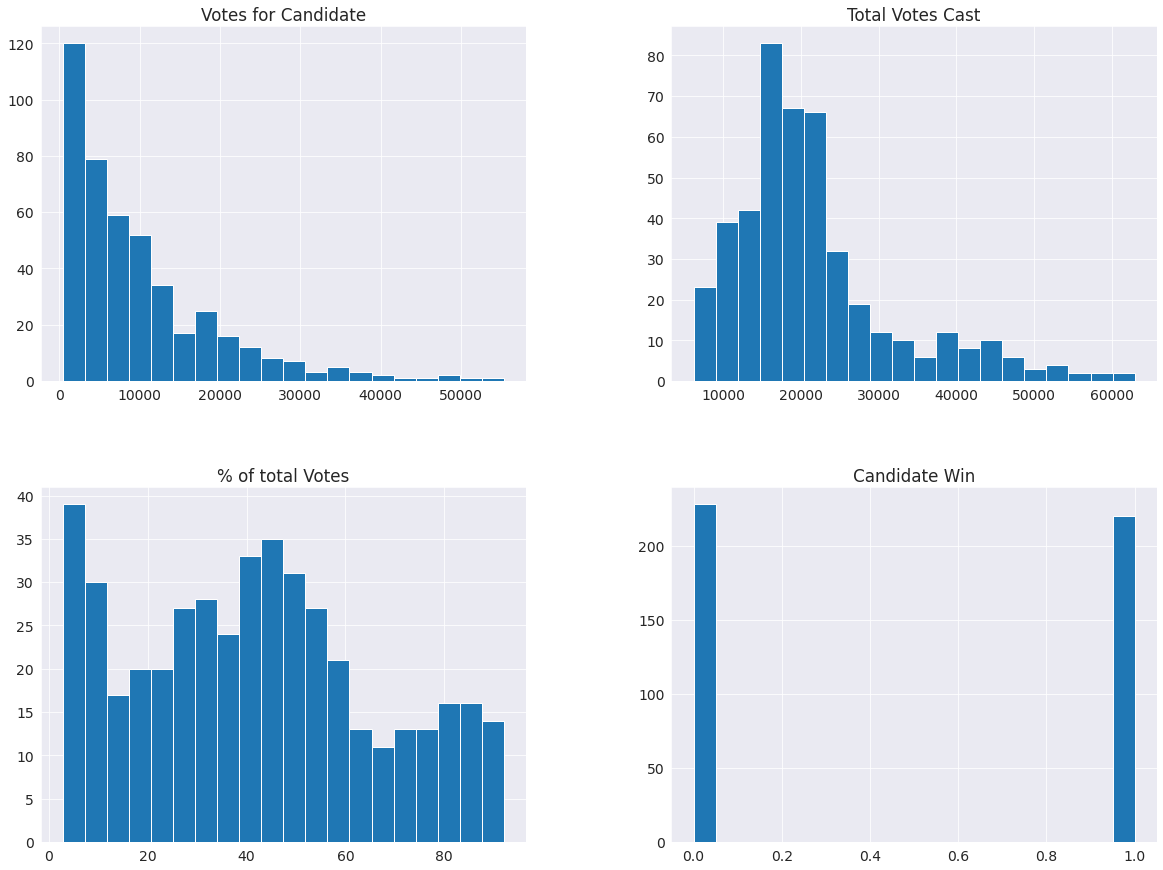

In [173]:
PKR_party.hist(bins = 20, figsize = (20,15))
plt.show()

This **Pie Chart** presents the percentage of winning candidate in each party and PKR has the most number of winning candidates (43.6%).

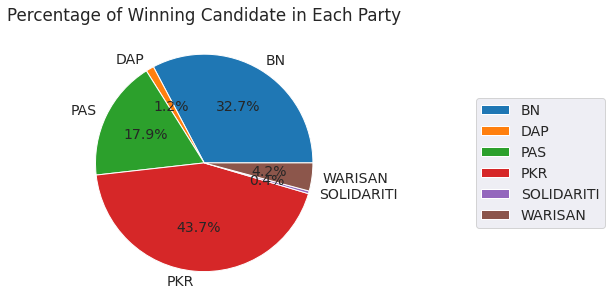

In [174]:
plt.pie(win_party['Candidate Win'], labels=win_party.index, autopct='%1.1f%%')
plt.legend(win_party.index, loc='right', bbox_to_anchor=(2,0.5))
plt.title('Percentage of Winning Candidate in Each Party')
plt.show()

The **bar chart** shows the total number of votes cast in each states where Sabah has the highest number of votes cast.

Text(0.5, 0, 'States')

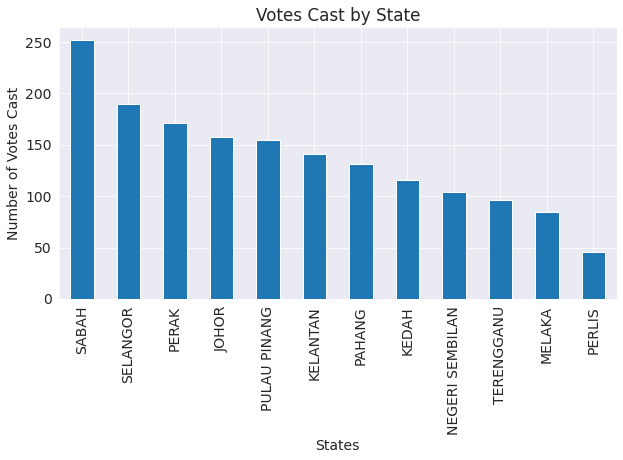

In [175]:
df.State.value_counts().plot.bar(figsize = (10,5))
plt.title('Votes Cast by State')
plt.ylabel('Number of Votes Cast')
plt.xlabel('States')

This **boxplot** demonstrates the percentage of total votes for each candidate party where it is positively skewed with no outliers.

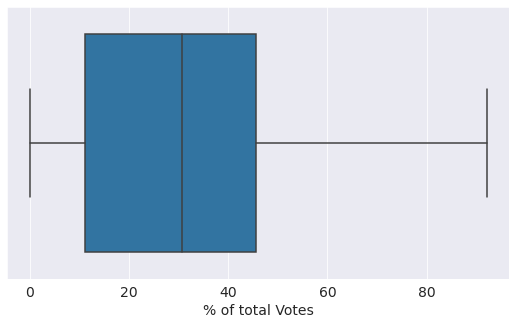

In [176]:
sns.boxplot(x=df['% of total Votes'])

The **scatterplot** exhibits the correlation between votes for candidate and total votes cast.


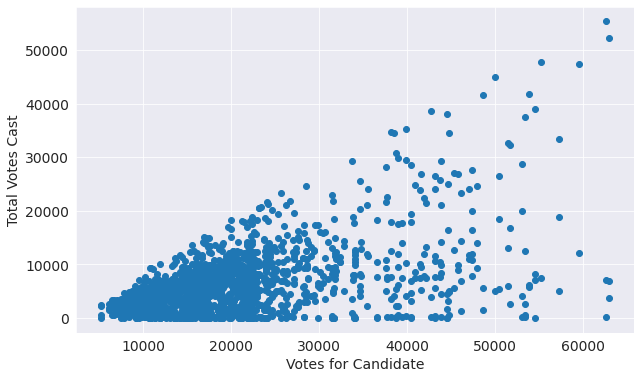

In [177]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Total Votes Cast'], df['Votes for Candidate'])
ax.set_xlabel('Votes for Candidate')
ax.set_ylabel('Total Votes Cast')
plt.show()

## Asking and Answering Questions

5 questions about this dataset will be asked and answered by using Pandas, Matplotlib and Seaborn. 


#### Q1: What is the percentage of male and female among the candidates?

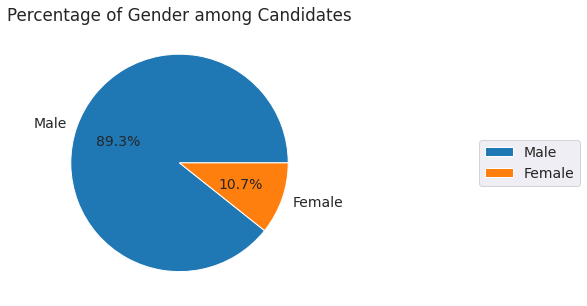

In [27]:
label = ['Male', 'Female']
plt.pie(df['Gender'].value_counts(), labels=label, autopct='%1.1f%%')
plt.legend(labels=label, loc='right', bbox_to_anchor=(2,0.5))
plt.title('Percentage of Gender among Candidates')
plt.show()

**Answer:** There are 89.3% of male candidates and 10.7% of female candidates in the general election of 2018.

#### Q2: From the winning candidates, what are number of male and female in each party? 

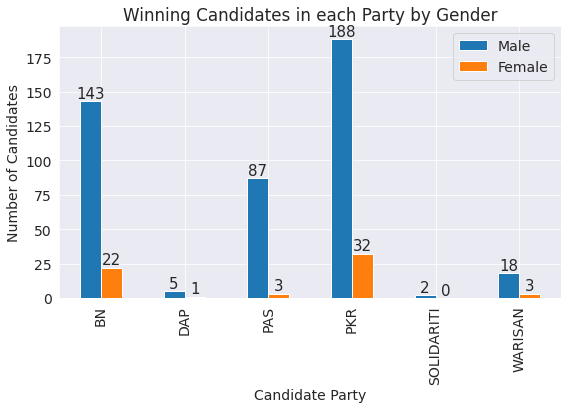

In [28]:
win_candidate = df[(df['Candidate Win'] == 1)]
ax = win_candidate.groupby(['Candidate Party', 'Gender']).size().unstack().plot(kind='bar', stacked=False)
for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Winning Candidates in each Party by Gender')
plt.ylabel('Number of Candidates')
plt.legend(labels=label)

**Answer:** Among the winning candidates, BN has 144 male and 22 female candidates; 

DAP has 5 male and 1 female candidates; 

PAS has 87 male and 3 female candidates; 

PKR has 188 male and 32 female candidates; 

SOLIDARITI has 2 male and 0 female candidates; 

Warisan has 18 male and 3 female candidates. 

#### Q3: Among the candidates from ANAKNEGERI party, what is the job title with most percentage?

Text(0.5, 1.0, 'Job Titles in ANAKNEGERI Party')

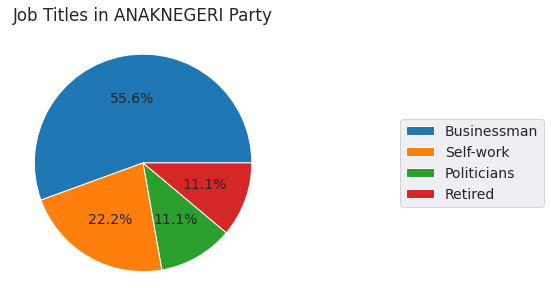

In [72]:
AN_party = df[(df['Candidate Party'] == 'ANAKNEGERI')]
plt.pie(AN_party['Pekerjaan'].value_counts(),autopct='%1.1f%%')
label = ['Businessman', 'Self-work','Politicians','Retired']
plt.legend(labels=label, loc='right', bbox_to_anchor=(2,0.5))
plt.title('Job Titles in ANAKNEGERI Party')


**Answer:** In ANAKNEGERI party, most candidates are businessman.

#### Q4: In Johor, which seat name did most people voted in during the election?

Text(0, 0.5, 'Seat Name')

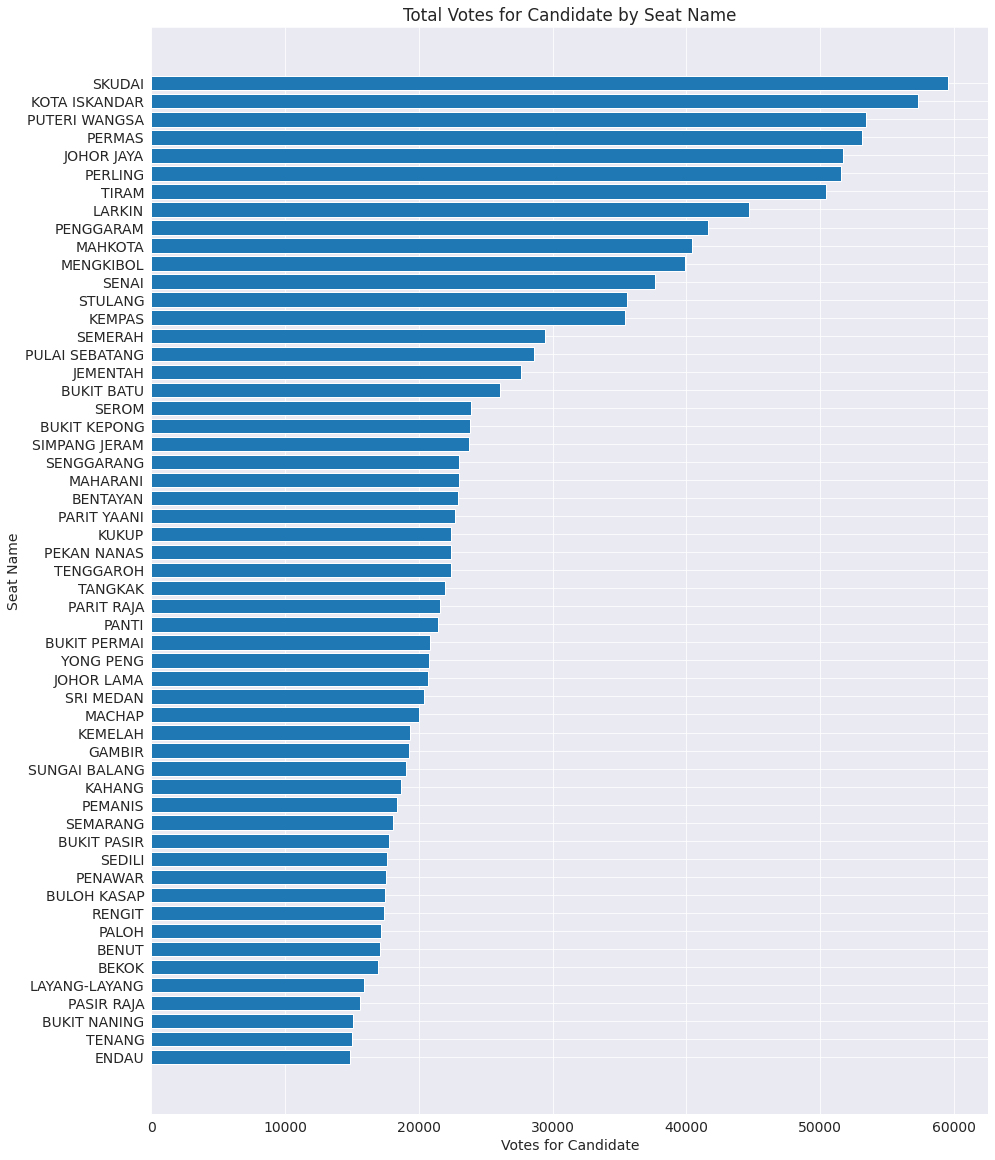

In [39]:
johor_state = df[(df['State'] == 'JOHOR')]
johor_state = johor_state.groupby('Seat Name')
total_state = johor_state['Votes for Candidate'].sum().sort_values(ascending = True)
ts = total_state[1:]
plt.figure(figsize=(15,20))
plt.barh(ts.index, ts.values)
plt.title('Total Votes for Candidate by Seat Name')
plt.xlabel('Votes for Candidate')
plt.ylabel('Seat Name')

**Answer:** In Johor, most people participated the voting for election in seat name Skudai. 

#### Q5: In Perlis, Beseri area, what is the votes for the each candidate party?

Text(0, 0.5, 'Votes for Candidate')

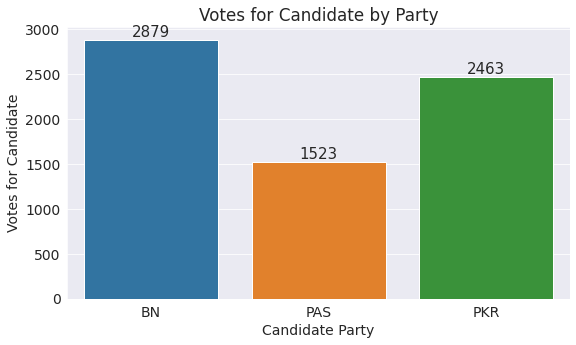

In [58]:
perlis_votes = df[(df['State']=='PERLIS') & (df['Seat Name'] == 'BESERI')]
perlis_votes = perlis_votes.groupby('Candidate Party')
votes = perlis_votes['Votes for Candidate'].sum()
splot = sns.barplot(x=votes.index, y=votes.values)
for bar in splot.patches:
  splot.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Votes for Candidate by Party')
plt.xlabel('Candidate Party')
plt.ylabel('Votes for Candidate')

**Answer:** In Perlis, Beseri area, BN has the most votes with a total of 2879 votes, followed by PAS with 1523 votes and PKR 2463 votes.

## Inferences and Conclusion

The process of cleaning, analyzing, and visualizing the data has been completed. From the questions answered above, we can observe that most of the candidates are male. This shows that men show more interest in politics than women. 

Moving on, the PKR party has won the majority of votes during the general election with a total of 220 winning candidates, followed by the BN party with the second highest number of winning candidates (166 people) and the PAS party with the third highest number of winning candidates (90 people). 

Furthermore, 1126 of the candidates have no occupation, which is considered the majority in this dataset. This means that most of the candidates only work as politicians. 

Besides, throughout this analysis, we found out that the total votes cast in each state has a big difference depends on the the number of citizens in each state. For example, Selangor ia city which near Putrajaya and Kuala Lumpur, the number of total votes cast is the highest among all the states. Compare to Perlis, it is a small state, the number of total votes cast is the lowest among all the states. From this analysis, we can see that a bigger city has a higher population and the small city has a lower population and this factor affects the number of total votes cast. 

## References and Future Work

Future projects related to the general election of Malaysia could use this dataset to investigate the results and predict the future parliment for the upcoming elections.

**Resources**

[Exploratory Data Analysis](https://colab.research.google.com/drive/1E99RyuEAZM8j2dvoxRqV8oWpg3kjqfBg#scrollTo=dB_j6LtTTO5j)

[Introduction to Exploratory Data Analysis](https://colab.research.google.com/drive/1DjKNfvPGkYyHQWpiEdyK4ozm-nXVa43D#scrollTo=nzh3zNvXEOOn)

[Matplotlib](https://colab.research.google.com/drive/1Sk44p68l7wwrldwtZ_jpQ9-CTeDDcpTH)

[Seaborn](https://colab.research.google.com/drive/1GWKtrW5GqZ8ifOh2deHLThxCpBE14A2c)

[UNDC](https://colab.research.google.com/drive/1bMSLUmU-gSVJh0SF6CVWx1ddM17uBe_n)


